## Import Dependencies

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import re

import pickle

In [2]:
!cp -r /content/drive/MyDrive/ML_PROJECTS/Recomendation_System/NeuralBeats/spotify_millsongdata.csv.zip /content/

In [3]:
!unzip /content/spotify_millsongdata.csv.zip

Archive:  /content/spotify_millsongdata.csv.zip
  inflating: spotify_millsongdata.csv  


In [4]:
df = pd.read_csv('/content/spotify_millsongdata.csv')

In [5]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [6]:
print(f"Number of Columns: {len(df.columns)}\n\n{df.columns}")

Number of Columns: 4

Index(['artist', 'song', 'link', 'text'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
df.isna().sum()

,0
artist,0
song,0
link,0
text,0


In [9]:
# Artist details
df['artist'].value_counts()

,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Alabama,187
...,...
Ungu,2
X-Treme,1
Zed,1


In [10]:
## Since link is not going to play role in recommendation of the music, we can simply drop the link column
df.drop('link', axis=1, inplace=True)
df.sample(1)

,artist,song,text
30536,Dream Theater,Hollow Years,He's just the kind of man \r\nYou hear about ...


## Ploting wordcloud

In [11]:
## word cloud
all_lyrics = "".join(df['text'].dropna())
wordcloud = WordCloud(height=200, width=800, background_color="white").generate(all_lyrics)

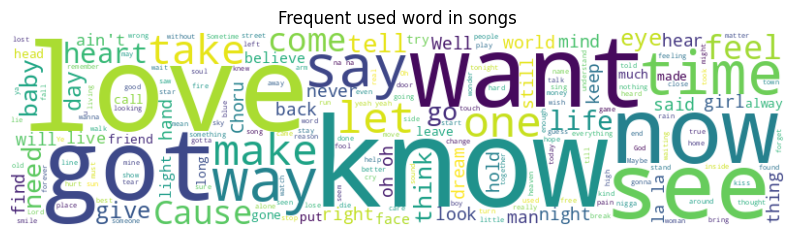

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent used word in songs")
plt.show()

## Data Processing

In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
## Building a function to process the data
def preprocess(text):
  # Remove special characters
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # Lower case all the text
  text = text.lower()

  # Tokenize the text
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]

  # Join tokens back to string (optional, for word cloud)
  return " ".join(tokens)

In [16]:
df['processed_text'] = df['text'].apply(preprocess)
df.sample(5)

,artist,song,text,processed_text
41744,Linkin Park,Burning In the Skies,I use the dead wood to make the fire rise \r\...,use dead wood make fire rise blood innocence b...
25081,Bee Gees,Massachusetts,"Feel I'm goin' back to Massachusetts, \r\nSom...",feel im goin back massachusetts somethings tel...
2633,Chicago,If You Leave Me Now,"If you leave me now, you'll take away the bigg...",leave youll take away biggest part ooohh baby ...
22405,Zayn Malik,Lucozade,I'm sipping pink Lucozade \r\nWe're blazing o...,im sipping pink lucozade blazing new found haz...
39415,Kate Bush,On Fire Inside A Snowball,Whenever I look out french windows \r\nIt's a...,whenever look french windows always snowing ou...


## Vectorize the text data

In [17]:
tfidf = TfidfVectorizer(max_features=5000)
vectorized_data = tfidf.fit_transform(df['processed_text'])

In [18]:
vectorized_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3249254 stored elements and shape (57650, 5000)>

In [19]:
# Cosine Similarity
cosine_sim = cosine_similarity(vectorized_data, vectorized_data)
cosine_sim

array([[1.        , 0.01092134, 0.0489077 , ..., 0.04426603, 0.04618225,
        0.01056558],
       [0.01092134, 1.        , 0.04380129, ..., 0.0663587 , 0.03950382,
        0.12154187],
       [0.0489077 , 0.04380129, 1.        , ..., 0.09616529, 0.01774347,
        0.04877253],
       ...,
       [0.04426603, 0.0663587 , 0.09616529, ..., 1.        , 0.01431685,
        0.0921034 ],
       [0.04618225, 0.03950382, 0.01774347, ..., 0.01431685, 1.        ,
        0.018383  ],
       [0.01056558, 0.12154187, 0.04877253, ..., 0.0921034 , 0.018383  ,
        1.        ]])

In [44]:
def find_song_match(song_name, df):
    """Find the closest matching song name in the dataset"""
    song_name = song_name.lower().strip()

    # Exact match
    exact_matches = df[df['song'].str.lower() == song_name]
    if not exact_matches.empty:
        return exact_matches.index[0], exact_matches['song'].iloc[0]

    # Partial match
    partial_matches = df[df['song'].str.lower().str.contains(song_name, na=False)]
    if not partial_matches.empty:
        return partial_matches.index[0], partial_matches['song'].iloc[0]

    # Token-based matching
    song_tokens = set(song_name.split())
    best_match_idx = None
    best_match_score = 0
    best_match_name = None

    for idx, row in df.iterrows():
        current_song = row['song'].lower()
        current_tokens = set(current_song.split())
        common_tokens = song_tokens.intersection(current_tokens)
        score = len(common_tokens)

        if score > best_match_score:
            best_match_score = score
            best_match_idx = idx
            best_match_name = row['song']

    if best_match_idx is not None and best_match_score > 0:
        return best_match_idx, best_match_name

    return None, None

## Recommendation Function

In [45]:
def recommend_song(song_name, cosine_sim, df, top_n=10):
    """Improved recommendation function with better search"""

    # Find the best matching song
    idx, matched_song_name = find_song_match(song_name, df)

    if idx is None:
        # Show some sample songs to help user
        sample_songs = df.sample(5)[['song', 'artist']].values.tolist()
        sample_text = "\n".join([f"- {song[0]} by {song[1]}" for song in sample_songs])
        return f"Song '{song_name}' not found in dataset.\n\nTry one of these:\n{sample_text}"

    print(f"Found match: '{matched_song_name}' (searching for '{song_name}')")

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N recommendations (excluding the song itself)
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]
    top_scores = [i[1] for i in sim_scores[1:top_n+1]]

    # Create recommendations dataframe
    recommendations = df.iloc[top_indices][['song', 'artist']].copy()
    recommendations['similarity_score'] = top_scores

    return recommendations

Let's pick a song that is in the dataframe and get recommendations for it.

In [47]:
recommend_song(song_name="Shape of you", cosine_sim=cosine_sim, df=df)

Found match: 'I'll Be Thinking Of You' (searching for 'Shape of you')


,song,artist,similarity_score
22166,Open Your Box,Yoko Ono,0.319670
22146,Hirake,Yoko Ono,0.318861
21306,Open Your Heart,Westlife,0.316542
54840,Open Your Heart,Vanessa Williams,0.308808
26061,Sunburst,Bob Seger,0.297727
19687,Open Arms,Tracy Chapman,0.293310
40107,My World Begins And Ends With You,Kenny Rogers,0.288975
19844,Lemon,U2,0.286662
19273,All This Time,Tiffany,0.279804
20784,Venus Man Trap,Veruca Salt,0.278672


Let's pick a song that is in the dataframe and get recommendations for it.

In [48]:
# Save everything needed for recommendations
model_data = {
    'df': df[['song', 'artist', 'processed_text']],
    'tfidf': tfidf,
    'cosine_sim': cosine_sim,
    'vectorized_data': vectorized_data
}

In [51]:
# Save to pickle file
with open('/content/drive/MyDrive/ML_PROJECTS/Recomendation_System/NeuralBeats/song_recommender_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model saved successfully as 'song_recommender_model.pkl'")
print(f"Dataset contains {len(df)} songs")

Model saved successfully as 'song_recommender_model.pkl'
Dataset contains 57650 songs
